In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
# getting basic information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# List of features to check for invalid zero values
features_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Replace zero values in these features with NaN (assuming zero means missing data)
df[features_to_check] = df[features_to_check].replace(0, np.nan)

# Print the total number of missing values per column
print(df.isna().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [7]:
# List of features to replace zeros with median
features_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

for feature in features_to_fix:
    median_valid = df[feature][df[feature] != 0].median()  # median excluding zeros
    df[feature] = df[feature].replace(0, median_valid)     # replace zeros
    df[feature] = df[feature].fillna(median_valid)         # fill NaN with median

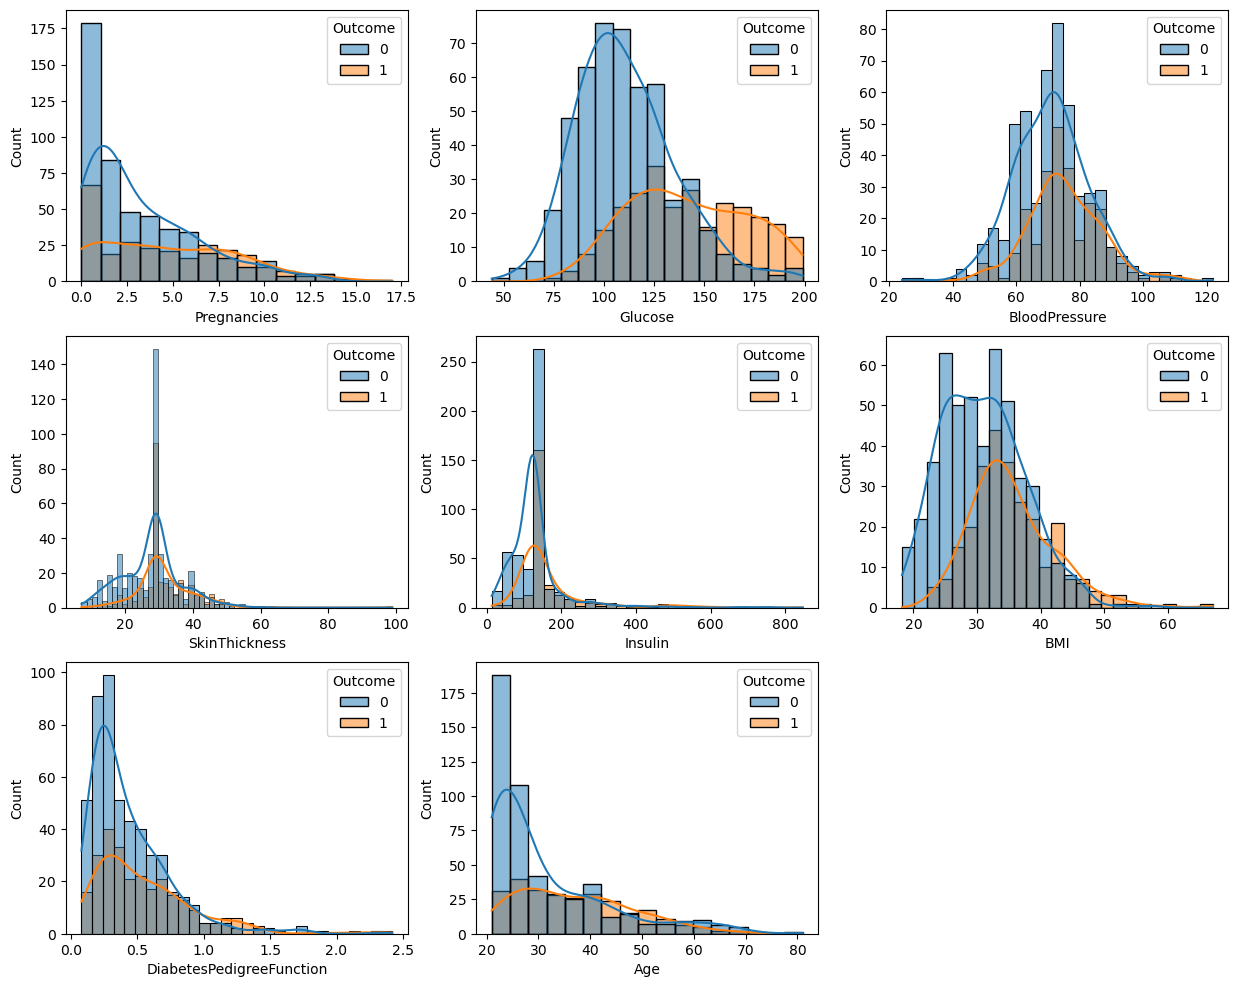

In [8]:
# visualizing the frequency of the features based on target feature
fig, axes = plt.subplots(3,3, figsize=(15,12))
sns.histplot(x='Pregnancies', hue='Outcome', data=df, kde=True, ax=axes[0][0])
sns.histplot(x='Glucose', hue='Outcome', data=df, kde=True, ax=axes[0][1])
sns.histplot(x='BloodPressure', hue='Outcome', data=df, kde=True, ax=axes[0][2])
sns.histplot(x='SkinThickness', hue='Outcome', data=df, kde=True, ax=axes[1][0])
sns.histplot(x='Insulin', hue='Outcome', data=df, kde=True, bins=30, ax=axes[1][1])
sns.histplot(x='BMI', hue='Outcome', data=df, kde=True, ax=axes[1][2])
sns.histplot(x='DiabetesPedigreeFunction', hue='Outcome', data=df, kde=True, ax=axes[2][0])
sns.histplot(x='Age', hue='Outcome', data=df, kde=True, ax=axes[2][1])

axes[2][2].set_visible(False)
plt.show()

In [9]:
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
# finding the dataset is balanced or imbalanced
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

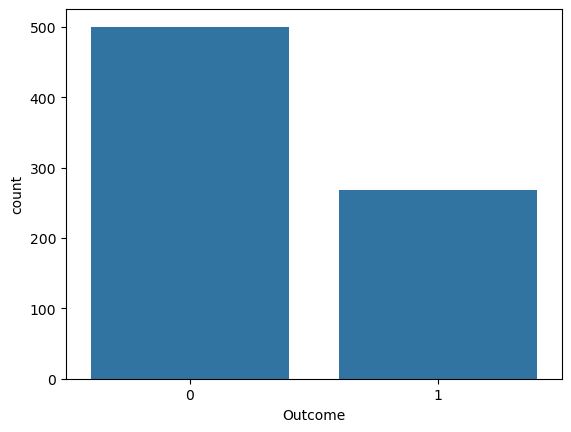

In [12]:
sns.countplot(x='Outcome',data=df)
plt.show()

In [28]:
# Separate independent features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Apply SMOTE (Synthetic Minority Oversampling Technique) to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Gabungkan kembali hasil SMOTE ke dalam satu DataFrame baru
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                pd.Series(y_resampled, name='Outcome')], axis=1)

# Cek jumlah kelas setelah SMOTE
print(df['Outcome'].value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


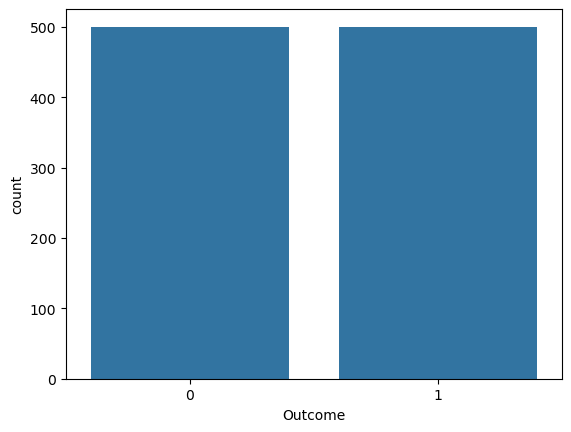

In [29]:
sns.countplot(x='Outcome',data=df)
plt.show()

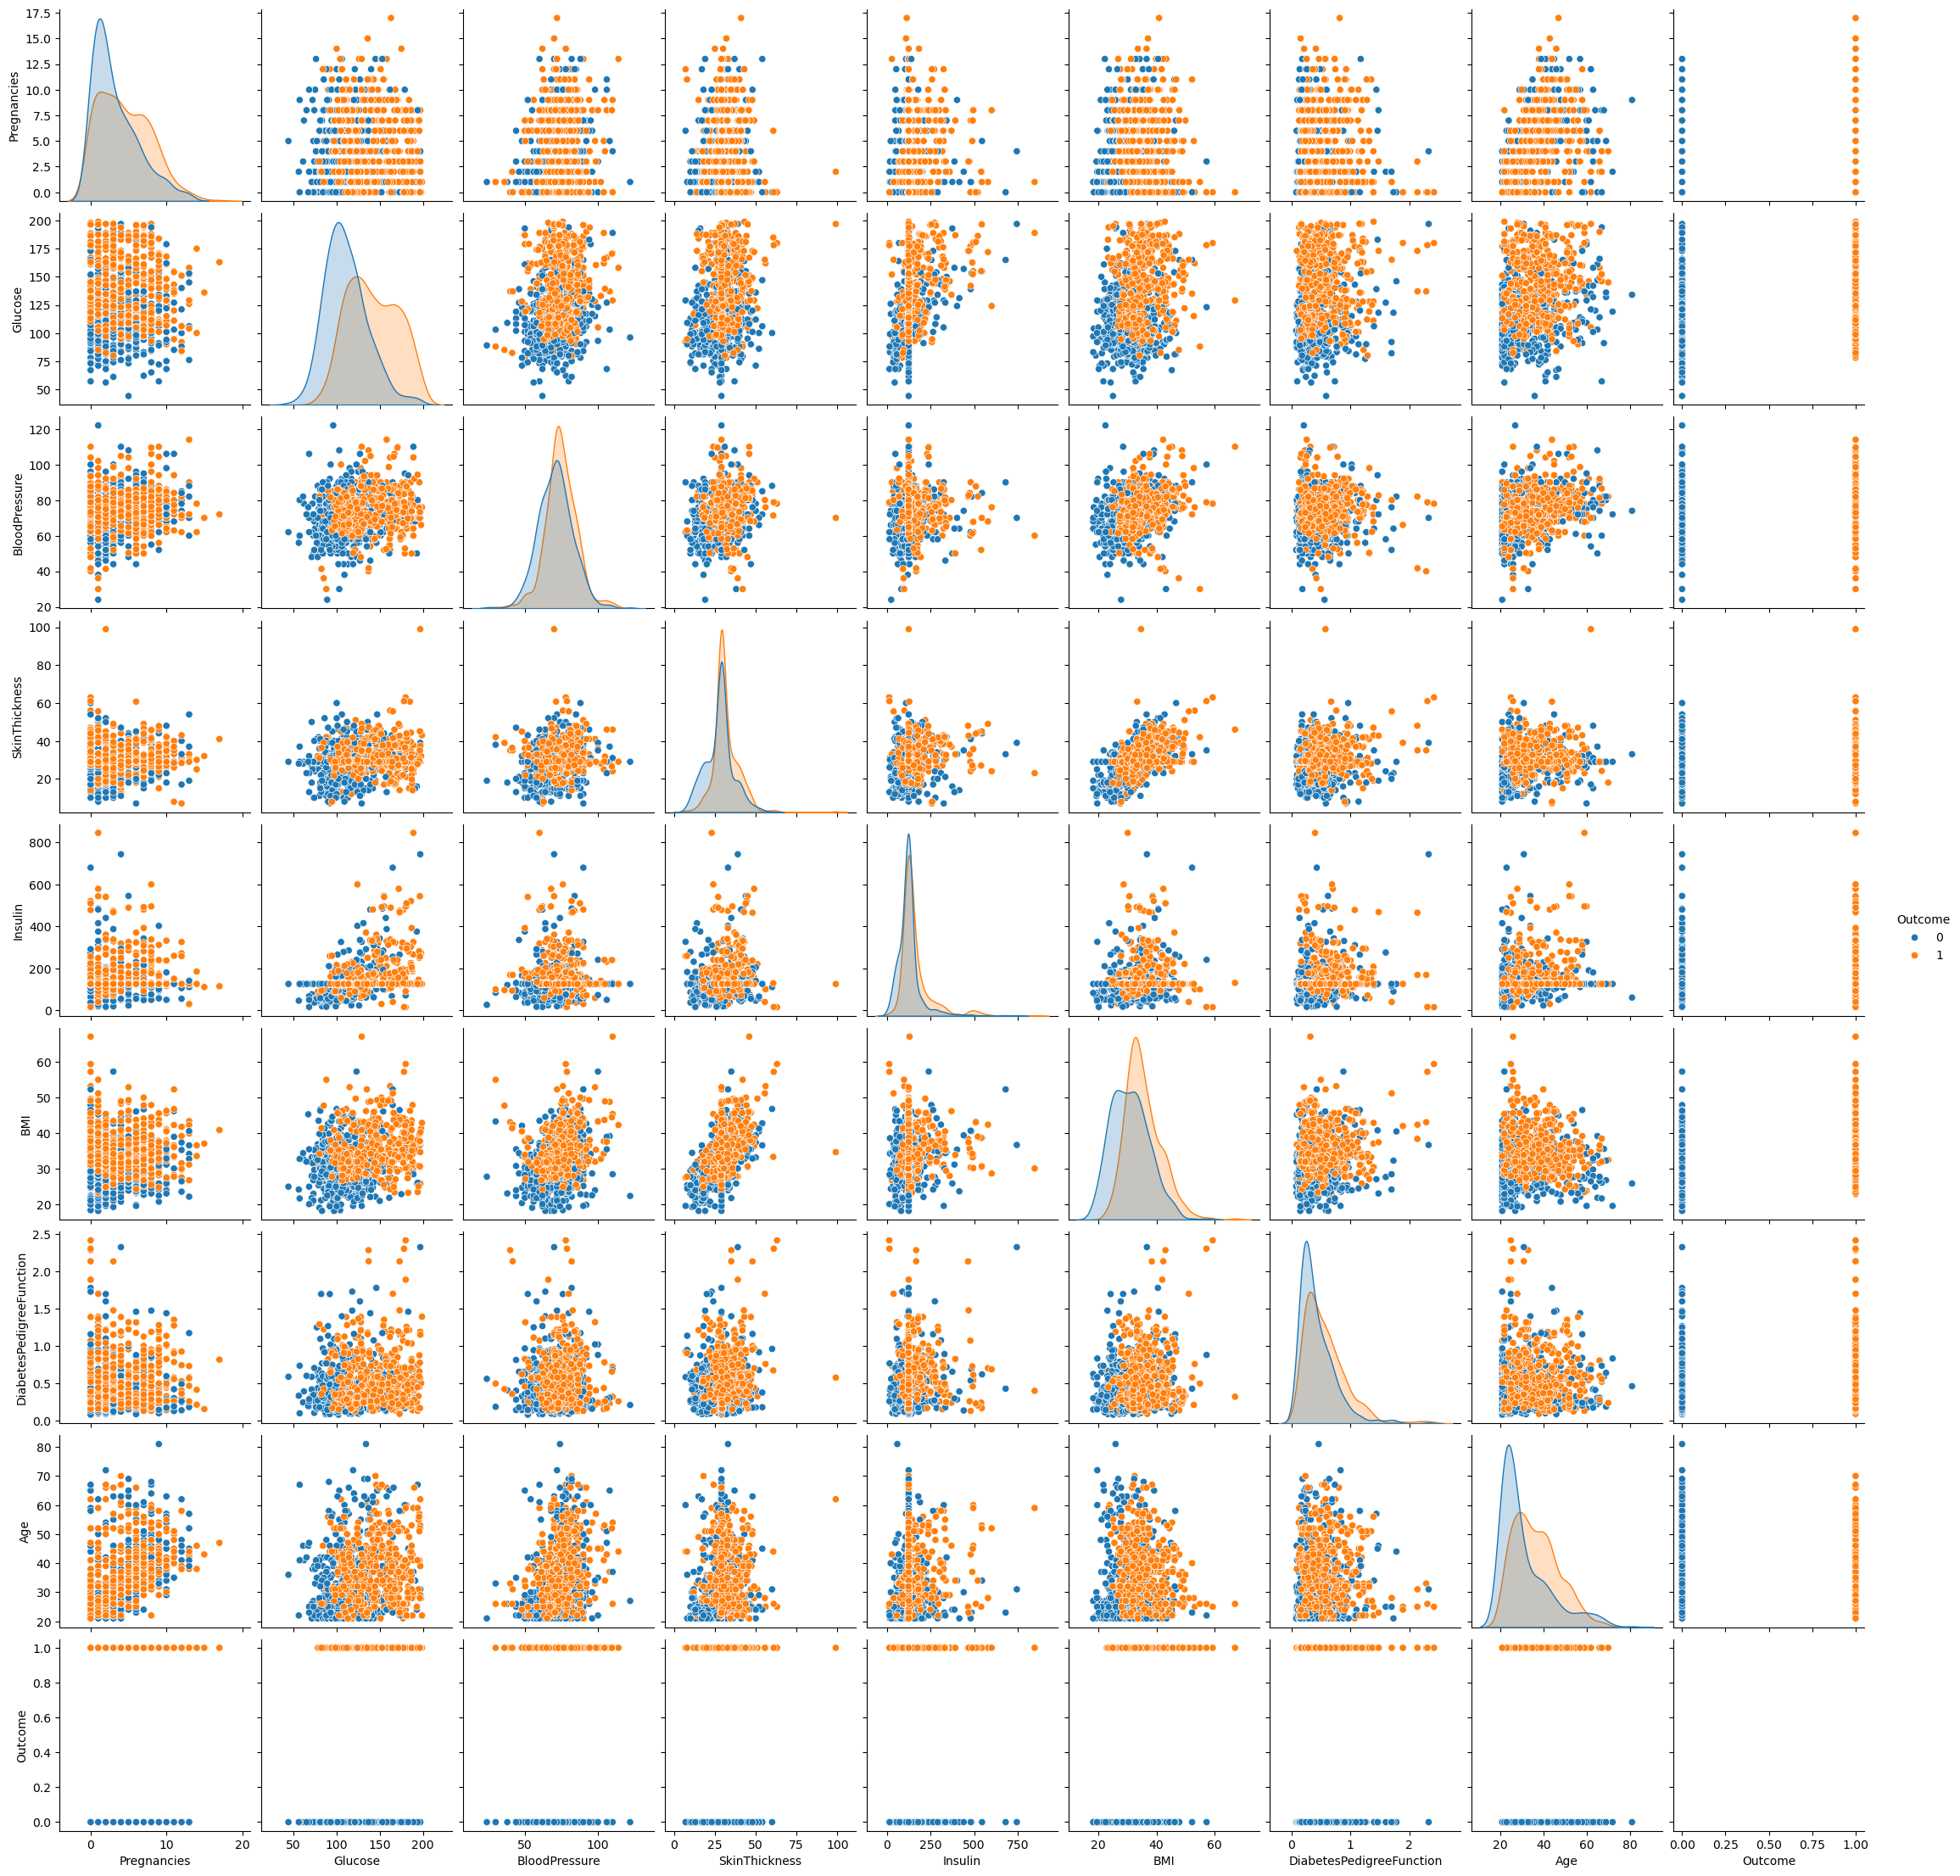

In [30]:
# visualizing the relationship between the features
sns.pairplot(vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                   'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], hue='Outcome', data=df)
plt.show()

In [16]:
# finding the correlation between features
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


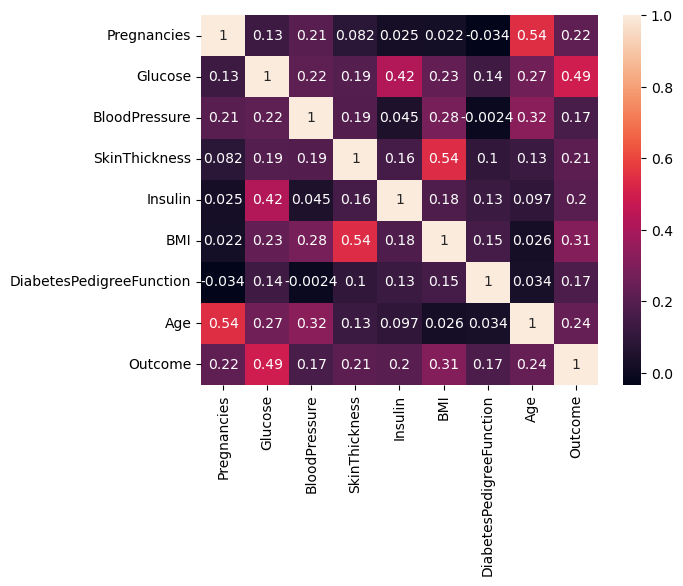

In [17]:
# visualizing the correlation with heatmap
sns.heatmap(corr, annot=True)
plt.show()

In [18]:
# Separate independent features (X) and target feature (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [19]:
# spliting the datas into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Building a Random Forest Classification model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# predicting the target with test set
y_pred = model_rf.predict(X_test)

In [26]:
# calculating the metrics of the model 
from sklearn.metrics import classification_report, accuracy_score, recall_score
class_report = classification_report(y_test,y_pred)
print(class_report)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)*100}\n')
print(f'Recall Score: {recall_score(y_test,y_pred)*100}\n')

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy Score: 74.67532467532467

Recall Score: 67.27272727272727



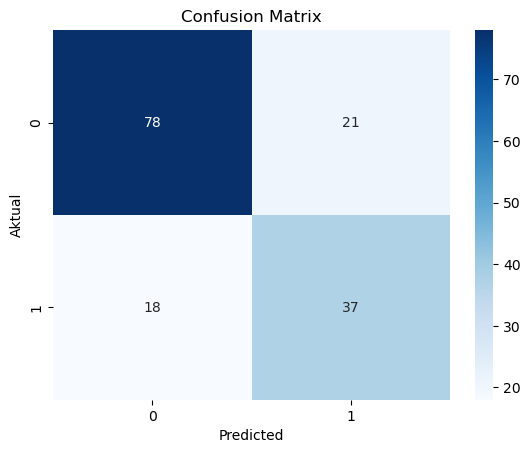

In [27]:
# Visualize the confusion matrix as a heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from joblib import dump

dump(model_rf, 'rf_diabetes_model.joblib')

['rf_diabetes_model.joblib']